# Spread Visualization and Prediction of the Novel Coronavirus Disease COVID-19 Using Machine Learning

### by Zahra Taheri - July 2020

<p align="center">
   <img  src=https://wineamerica.org/wp-content/uploads/2020/03/Covid-19-Atlantic.jpeg width="500"/>
</p>

 <br>

The current destructive pandemic of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) [[1]](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/technical-guidance/naming-the-coronavirus-disease-(covid-2019)-and-the-virus-that-causes-it), was first reported in Wuhan, China, in December 2019 [[2]](https://www.who.int/csr/don/12-january-2020-novel-coronavirus-china/en/). The outbreak has affected millions of people around the world and the number of infections and mortalities has been growing at an alarming rate. In such a situation, forecasting and proper study of the pattern of disease spread can inspire design better strategies to make more efficient decisions. Moreover, such studies play an important role in achieving accurate predictions. 

Machine learning has numerous tools  that can be used for visualization and prediction, and nowadays it is used worldwide for study of the pattern of COVID-19 spread. One of the main focus of the study in this project is to use machine learning techniques to analyze and visualize the spreading of the virus country-wise as well as globally during a specific period of time by considering confirmed cases, recovered cases and fatalities.

The global impact of the outbreak on various aspects of life has been the focus of many studies. On the other hand, a pandemic can be forecast by considering a variety of parameters such as the impact of environmental factors, quarantine, age, gender and a lot more. 

The forecasting accuracy depends on the availability of proper data to base its predictions and provide an estimate of uncertainty. A challenge to use machine learning techniques for the current outbreak is that the datasets are not yet standardized by any standardization organization and the statistical anomalies are not considered. Also, the appropriate selection of parameters and the selection of the best machine learning model for prediction are other challenges involved in training a model. 

In this project, we are going to perform Linear regression, Support vector machine, Multilayer perceptron, Ensemble methods, etc., on the Johns Hopkins University's COVID-19 data to anticipate the future effects of COVID-19 pandemic in Iran and some other countries. Moreover, we are going to study the impact of some parameters such as geographic conditions, economic statistics, population statistics, life expectancy, etc., in prediction of COVID-19 spread.
<br>

- Data sources: 
    - [COVID-19 datasets from Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)
    - [World-happiness dataset from Kaggle](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv)
    - [Population by country - 2020 from Kaggle](https://www.kaggle.com/tanuprabhu/population-by-country-2020)
- More information: 
    - [World Health Organization (WHO)](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)    
- Last datasets update:
    - 21 July 2020    
- Image source:
    - https://wineamerica.org/wp-content/uploads/2020/03/Covid-19-Atlantic.jpeg
- My contact Info: 
    - https://github.com/zata213/
    - zahra.taheri518@gmail.com 


## Current date and time

In [ ]:
from datetime import datetime

print(datetime.now())

## Some installations to show plotly in the Jupyter lab

In [2]:
#%pip install nodejs

#%pip install jupyterlab "ipywidgets>=7.5"

#%pip install npm

# JupyterLab renderer support
#!jupyter labextension install jupyterlab-plotly@4.8.2

In [3]:
#%pip install pycountry

In [4]:
# define a function to display plotly in notebook without above installations
# It seems that in Colab, it is needed to do above installations together with this function

#def configure_plotly_browser_state():
#  import IPython
#  display(IPython.core.display.HTML('''
#        <script src="/static/components/requirejs/require.js"></script>
#        <script>
#          requirejs.config({
#            paths: {
#              base: '/static/base',
#              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
#            },
#          });
#        </script>
#        '''))


# paste the following line at the begining of the cell containing plotly

#configure_plotly_browser_state()

## Some other installations

In [5]:
#%pip install statsmodels

#%pip install pystan

#%pip install fbprophet

## Import some libraries

In [6]:
# for dataset handeling and calculations
import numpy as np 
import pandas as pd 

# for basic visualizations
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
%matplotlib inline 

# for advanced visualizations
import seaborn as sns

# for interactive visualizations
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# for offline ploting 
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

# for date and time operations
from datetime import datetime,timedelta

# for file and folder operations
import os

# for modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.tsa.arima_model import ARIMA
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
#from tensorflow import keras

np.random.seed(42)
#tf.random.set_seed(42)

## Path to the files directory

In [7]:
path = os.getcwd()

if os.path.exists(path+"\data")==False:
    print("Make file directory!")
    os.mkdir(path+"\data")

mypath = path+"\data"

In [8]:
# path to the directory
 
os.chdir(mypath)

print(os.getcwd())

C:\Users\Zahra\project-covid\data


## Read datasets

In [9]:
# read files from hard drive

#confirmed_df = pd.read_csv('confirmed_df.csv')
#recovered_df=pd.read_csv('recovered_df.csv')
#deaths_df=pd.read_csv('deaths_df.csv')

In [10]:
# remove all '*.csv' files in the current directory
import glob
for file in glob.glob("*.csv"):
    os.remove(file)

# read files from url
download_root='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_df = pd.read_csv(download_root+"time_series_covid19_confirmed_global.csv")
recovered_df=pd.read_csv(download_root+"time_series_covid19_recovered_global.csv")
deaths_df=pd.read_csv(download_root+"time_series_covid19_deaths_global.csv")

# save datasets as '*.csv' file 
confirmed_df.to_csv('confirmed_df.csv', index=False)
recovered_df.to_csv('recovered_df.csv', index=False)
deaths_df.to_csv('deaths_df.csv', index=False)

In [11]:
confirmed_df.head(3)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/14/20  7/15/20  7/16/20  \
0        0        0        0        0  ...    34740    34994    35070   
1        0        0        0        0  ...     3667     3752     3851   
2        0        0        0        0  ...    20216    20770    21355   

   7/17/20  7/18/20  7/19/20  7/20/20  7/21/20  7/22/20  7/23/20  
0    35229    35301    35475    35526    35615    35727    35928  
1     3906     4008     4090     4171     4290     4358     4466  
2    21948    22549    23084    23691    24278    24872    25484  

[3 rows x 188 columns]

In [12]:
deaths_df.head(3)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/14/20  7/15/20  7/16/20  \
0        0        0        0        0  ...     1048     1094     1113   
1        0        0        0        0  ...       97      101      104   
2        0        0        0        0  ...     1028     1040     1052   

   7/17/20  7/18/20  7/19/20  7/20/20  7/21/20  7/22/20  7/23/20  
0     1147     1164     1181     1185     1186     1190     1211  
1      107      111      112      113      117      120      123  
2     1057     1068     1078     1087     1100     1111     1124  

[3 rows x 188 columns]

In [13]:
recovered_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/14/20  7/15/20  7/16/20  \
0        0        0        0        0  ...    21454    22456    22824   
1        0        0        0        0  ...     2062     2091     2137   
2        0        0        0        0  ...    14295    14792    15107   
3        0        0        0        0  ...      803      803      803   
4        0        0        0        0  ...      118      124      124   

   7/17/20  7/18/20  7/19/20  7/20/20  7/21/20  7/22/20  7/23/20  
0    23151    23273    23634    23741    23741    23924    24550  
1     2214     2264     2311     2352     2397     2463     2523  
2    15430    15744    16051    16400    16646    16983    17369  
3      803      803      803      803      803      803      803  
4      199      210      221      221      221      221      236  

[5 rows x 188 columns]

## Make a full dataframe by merging three latter ones

In [14]:
# melt dataframes to go from wide to long
def melt_df(df,name):
    melted = pd.melt(df,id_vars=['Province/State','Country/Region','Lat','Long'],
                        value_vars=confirmed_df.columns[4:],
                        var_name='Date',value_name=name)
    return melted

melt_confirmed = melt_df(confirmed_df,'Confirmed')
melt_deaths = melt_df(deaths_df,'Deaths')
melt_recovered = melt_df(recovered_df,'Recovered')

#print(melt_confirmed.shape)
#print(melt_deaths.shape)
#print(melt_recovered.shape)
print(melt_confirmed.head())

# merge dataframes
def merge(df1,df2):
    merged = pd.merge(left=df1,right=df2, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
    return merged

main_df = merge(merge(melt_confirmed,melt_deaths),melt_recovered)

print(main_df.shape)
main_df.head()

  Province/State Country/Region       Lat       Long     Date  Confirmed
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0
1            NaN        Albania  41.15330  20.168300  1/22/20          0
2            NaN        Algeria  28.03390   1.659600  1/22/20          0
3            NaN        Andorra  42.50630   1.521800  1/22/20          0
4            NaN         Angola -11.20270  17.873900  1/22/20          0
(48944, 8)


Province/State Country/Region       Lat       Long     Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0   
1            NaN        Albania  41.15330  20.168300  1/22/20          0   
2            NaN        Algeria  28.03390   1.659600  1/22/20          0   
3            NaN        Andorra  42.50630   1.521800  1/22/20          0   
4            NaN         Angola -11.20270  17.873900  1/22/20          0   

   Deaths  Recovered  
0       0        0.0  
1       0        0.0  
2       0        0.0  
3       0        0.0  
4       0        0.0

In [15]:
main_df.to_csv('covid19_full_uncleaned.csv', index=False)

## Preparation of the dataset

In [16]:
# Percentage of missing data in each column

number_of_columns = main_df.shape[0]
percentage_of_missing_data = main_df.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

Province/State    0.695489
Country/Region    0.000000
Lat               0.000000
Long              0.000000
Date              0.000000
Confirmed         0.000000
Deaths            0.000000
Recovered         0.071429
dtype: float64


In [17]:
# fill missing values of 'Recovered' with 0
main_df['Recovered'] = main_df['Recovered'].fillna(0)

# fill missing values of 'province/state' with ''
main_df['Province/State'] = main_df['Province/State'].fillna('')

# convert values of 'Recovered' to int datatype
main_df['Recovered'] = main_df['Recovered'].astype('int')

# change names of some countries
main_df['Country/Region'] = main_df['Country/Region'].replace('Korea, South', "South Korea")
main_df['Country/Region'] = main_df['Country/Region'].replace('Mainland China', 'China')
main_df['Country/Region'] = main_df['Country/Region'].replace('Taiwan*', 'Taiwan')
main_df['Country/Region'] = main_df['Country/Region'].replace('Congo (Kinshasa)', 'Democratic Republic of the Congo')
main_df['Country/Region'] = main_df['Country/Region'].replace('Congo (Brazzaville)', 'Republic of the Congo')
main_df.loc[main_df['Province/State']=='Greenland', 'Country/Region'] = 'Greenland'

# define new feature for main_df
main_df['Active'] = main_df['Confirmed'] - main_df['Deaths'] - main_df['Recovered']

main_df.tail()

Province/State         Country/Region        Lat       Long     Date  \
48939                 Sao Tome and Principe   0.186400   6.613100  7/23/20   
48940                                 Yemen  15.552727  48.516388  7/23/20   
48941                               Comoros -11.645500  43.333300  7/23/20   
48942                            Tajikistan  38.861000  71.276100  7/23/20   
48943                               Lesotho -29.610000  28.233600  7/23/20   

       Confirmed  Deaths  Recovered  Active  
48939        749      14        604     131  
48940       1654     461        762     431  
48941        340       7        324       9  
48942       7060      58       5793    1209  
48943        359       6         69     284

In [18]:
print(main_df['Date'].describe(),'\n')

# convert dates to proper date format for better visualization
#.dt.normalize() is just to change display from 2020-04-09 00:00:00 to 2020-04-09

main_df['Date'] = pd.to_datetime(main_df['Date']).dt.normalize()

print(main_df['Date'].describe())
main_df['Date']

count       48944
unique        184
top       2/17/20
freq          266
Name: Date, dtype: object 

count                   48944
unique                    184
top       2020-04-09 00:00:00
freq                      266
first     2020-01-22 00:00:00
last      2020-07-23 00:00:00
Name: Date, dtype: object


0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
48939   2020-07-23
48940   2020-07-23
48941   2020-07-23
48942   2020-07-23
48943   2020-07-23
Name: Date, Length: 48944, dtype: datetime64[ns]

### Web scraping to get [WHO regions related to country names](https://www.who.int/choice/demography/by_country/en/)

- African Region (AFRO)
- Region of the Americas (PAHO)
- South-East Asia Region (SEARO)
- European Region (EURO)
- Eastern Mediterranean Region (EMRO)
- Western Pacific Region (WPRO)

In [19]:
# remove rows in which 'Country/Region' is a ship name

main_df = main_df[main_df['Country/Region'].str.contains('Diamond Princess')!=True]
main_df = main_df[main_df['Country/Region'].str.contains('MS Zaandam')!=True]

In [20]:
# required installations

#%pip install lxml html5lib beautifulsoup4

In [21]:
# Webpage url                                                                                                               
url = 'https://www.who.int/choice/demography/by_country/en/'

# Extract tables
dfs = pd.read_html(url)

# Get first table                                                                                                           
df = dfs[0]

# Extract columns                                                                                                           
df2 = df[['Country','Region Name']]
print(df2)

# Write to excel
df2.to_csv('WHO_regions.csv', index=False)

WHO_regions=pd.read_csv('WHO_regions.csv')

         Country Region Name
0              A         NaN
1    Afghanistan        EMRO
2        Albania        EURO
3        Algeria        AFRO
4        Andorra        EURO
..           ...         ...
213            Y         NaN
214        Yemen        EMRO
215            Z         NaN
216       Zambia        AFRO
217     Zimbabwe        AFRO

[218 rows x 2 columns]


#### Add 'WHO region' column

In [22]:
# WHO_regions dataframe to dictionary
new_who=WHO_regions.copy()
new_who=new_who.set_index('Country').T.to_dict('list')

# add 'WHO region' column
for k, v in new_who.items():
    main_df.loc[(main_df['Country/Region'] == k), 'WHO region'] = v[0]
    
# find missing values
print(main_df[main_df['WHO region'].isna()]['Country/Region'].unique().tolist())

['Antigua and Barbuda', 'Brunei', 'Cabo Verde', 'Republic of the Congo', "Cote d'Ivoire", 'Czechia', 'Greenland', 'Eswatini', 'Holy See', 'Iran', 'South Korea', 'Liechtenstein', 'Moldova', 'North Macedonia', 'Russia', 'Taiwan', 'Tanzania', 'US', 'Vietnam', 'Syria', 'Laos', 'West Bank and Gaza', 'Kosovo', 'Burma', 'Western Sahara', 'Sao Tome and Principe']


In [23]:
# fill missing values of WHO region

who_exceptions={'Antigua and Barbuda':'PAHO', 'Brunei':'WPRO', 'Cabo Verde':'AFRO', 'Republic of the Congo':'AFRO',
 "Cote d'Ivoire":'AFRO', 'Czechia':'EURO', 'Greenland':'EURO', 'Eswatini':'AFRO', 'Holy See':'EURO', 'Iran':'EMRO',
 'South Korea':'WPRO', 'Liechtenstein':'EURO', 'Moldova':'EURO', 'North Macedonia':'EURO', 'Russia':'EURO',
 'Taiwan':'WPRO', 'Tanzania':'AFRO', 'US':'PAHO', 'Vietnam':'WPRO', 'Syria':'EMRO', 'Laos':'WPRO', 
'West Bank and Gaza':'EMRO', 'Kosovo':'EURO', 'Burma':'SEARO', 'Western Sahara':'AFRO', 'Sao Tome and Principe':'AFRO'}

for k, v in who_exceptions.items():
    main_df.loc[(main_df['Country/Region'] == k), 'WHO region'] = v

# find missing values
print(main_df[main_df['WHO region'].isna()]['Country/Region'].unique())

[]


In [24]:
main_df.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0                   Afghanistan  33.93911  67.709953 2020-01-22          0   
1                       Albania  41.15330  20.168300 2020-01-22          0   
2                       Algeria  28.03390   1.659600 2020-01-22          0   
3                       Andorra  42.50630   1.521800 2020-01-22          0   
4                        Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active WHO region  
0       0          0       0       EMRO  
1       0          0       0       EURO  
2       0          0       0       AFRO  
3       0          0       0       EURO  
4       0          0       0       AFRO

### Save main_df to csv

In [25]:
main_df.to_csv('covid19_full_cleaned.csv', index=False)

In [26]:
#main_df=pd.read_csv('covid19_full_cleaned.csv') 

### Group covid19_full_cleaned dataframe by 'Date' and 'Country/Region'

In [27]:
covid19_date_country = main_df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()\
                                .reset_index()

# add new columns containing new confirmed, new deaths and new recovered for each day
new_col = covid19_date_country.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()\
                                    .diff().reset_index()
# rename some columns of new_col
new_col.columns = ['Country/Region', 'Date', 'New confirmed', 'New deaths', 'New recovered']
columns = ['New confirmed', 'New deaths', 'New recovered']

# fix the value of first row of each country
first_rows = (new_col['Country/Region'] != new_col['Country/Region'].shift(1))
new_col.loc[first_rows, 'New confirmed'] = 0
new_col.loc[first_rows, 'New deaths'] = 0
new_col.loc[first_rows, 'New recovered'] = 0

# merging new values
covid19_date_country = pd.merge(covid19_date_country, new_col, on=['Country/Region', 'Date'])

# fill missing values with 0
covid19_date_country = covid19_date_country.fillna(0)

covid19_date_country['New confirmed'] = covid19_date_country['New confirmed'].apply(lambda x: 0 if x<0 else x)

# fix datatypes of new columns
covid19_date_country[columns] = covid19_date_country[columns].astype('int')

# add 'WHO region' column
for k, v in new_who.items():
    covid19_date_country.loc[(covid19_date_country['Country/Region'] == k), 'WHO region'] = v[0]
    
for k, v in who_exceptions.items():
    covid19_date_country.loc[(covid19_date_country['Country/Region'] == k), 'WHO region'] = v

# find missing values
print(covid19_date_country[covid19_date_country['WHO region'].isna()]['Country/Region'].unique())

[]


In [28]:
covid19_date_country.tail()

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
34403 2020-07-23  West Bank and Gaza       9744      67       2720    6957   
34404 2020-07-23      Western Sahara         10       1          8       1   
34405 2020-07-23               Yemen       1654     461        762     431   
34406 2020-07-23              Zambia       3789     134       1677    1978   
34407 2020-07-23            Zimbabwe       2124      28        510    1586   

       New confirmed  New deaths  New recovered WHO region  
34403            346           1            770       EMRO  
34404              0           0              0       AFRO  
34405             14           3             11       EMRO  
34406            206           6              0       AFRO  
34407             90           2              0       AFRO

In [29]:
# save as .csv file
covid19_date_country.to_csv('covid19_date_country.csv', index=False)

# save iran_df.csv file
iran_df=covid19_date_country[covid19_date_country['Country/Region'] == 'Iran']
iran_df.to_csv('covid19_iran.csv',index=False)

In [30]:
#covid19_date_country.to_csv('covid19_date_country.csv', index=False)

### Dataframe with the latest values of 'Country/Region'

In [31]:
# get the latest values related to each country
covid19_country_latest = covid19_date_country[covid19_date_country['Date']==max(covid19_date_country['Date'])].reset_index(drop=True)\
                    .drop('Date', axis=1)

print(covid19_country_latest.shape)
print(covid19_country_latest['Country/Region'].unique().shape)

# drop 'WHO region' column
covid19_country_latest = covid19_country_latest.drop('WHO region', axis=1)

# mortality and recovery rates
covid19_country_latest['Recovery rate(per 100)'] = \
                np.round(100*covid19_country_latest['Recovered']/covid19_country_latest['Confirmed'],2)
covid19_country_latest['Mortality rate(per 100)'] = \
                np.round(100*covid19_country_latest['Deaths']/covid19_country_latest['Confirmed'],2)

# fill missing values with 0
columns = ['Recovery rate(per 100)', 'Mortality rate(per 100)']
covid19_country_latest[columns] = covid19_country_latest[columns].fillna(0)

# add 'WHO region' column
for k, v in new_who.items():
    covid19_country_latest.loc[(covid19_country_latest['Country/Region'] == k), 'WHO region'] = v[0]
    
for k, v in who_exceptions.items():
    covid19_country_latest.loc[(covid19_country_latest['Country/Region'] == k), 'WHO region'] = v

# find missing values
print(covid19_country_latest[covid19_country_latest['WHO region'].isna()]['Country/Region'].unique())

covid19_country_latest.head()

(187, 9)
(187,)
[]


Country/Region  Confirmed  Deaths  Recovered  Active  New confirmed  \
0    Afghanistan      35928    1211      24550   10167            201   
1        Albania       4466     123       2523    1820            108   
2        Algeria      25484    1124      17369    6991            612   
3        Andorra        889      52        803      34              0   
4         Angola        851      33        236     582             39   

   New deaths  New recovered  Recovery rate(per 100)  Mortality rate(per 100)  \
0          21            626                   68.33                     3.37   
1           3             60                   56.49                     2.75   
2          13            386                   68.16                     4.41   
3           0              0                   90.33                     5.85   
4           0             15                   27.73                     3.88   

  WHO region  
0       EMRO  
1       EURO  
2       AFRO  
3       EURO  
4       AFRO

In [32]:
# save as .csv file
covid19_country_latest.to_csv('covid19_country_latest.csv', index=False)

### Group covid19_day_country dataframe by 'Date'

In [33]:
covid19_world = covid19_date_country.groupby('Date')['Confirmed', 'Deaths', 'Recovered','Active', 'New confirmed', 'New deaths',
                                                'New recovered'].sum().reset_index()

# mortality and recovery rates

covid19_world['Recovery rate(per 100)'] = \
                np.round(100*covid19_world['Recovered']/covid19_world['Confirmed'],2)
covid19_world['Mortality rate(per 100)'] = \
                np.round(100*covid19_world['Deaths']/covid19_world['Confirmed'],2)

# Number of countries having non-zero confirmed cases in each date
covid19_world['Number of countries'] = covid19_date_country[covid19_date_country['Confirmed']!=0].groupby('Date')['Country/Region']\
                                .unique().apply(len).values

# fill missing values with 0
columns = ['Recovery rate(per 100)', 'Mortality rate(per 100)']
covid19_world[columns] = covid19_world[columns].fillna(0)

covid19_world.head()

Date  Confirmed  Deaths  Recovered  Active  New confirmed  New deaths  \
0 2020-01-22        555      17         28     510              0           0   
1 2020-01-23        654      18         30     606             99           1   
2 2020-01-24        941      26         36     879            287           8   
3 2020-01-25       1434      42         39    1353            493          16   
4 2020-01-26       2118      56         52    2010            684          14   

   New recovered  Recovery rate(per 100)  Mortality rate(per 100)  \
0              0                    5.05                     3.06   
1              2                    4.59                     2.75   
2              6                    3.83                     2.76   
3              3                    2.72                     2.93   
4             13                    2.46                     2.64   

   Number of countries  
0                    6  
1                    8  
2                    9  
3                   11  
4                   13

In [34]:
# save as '*.csv' file
covid19_world.to_csv('covid19_world.csv', index=False)

## Visualizations

### The latest global status

In [35]:
covid19_world['Date'] = pd.to_datetime(covid19_world['Date'])

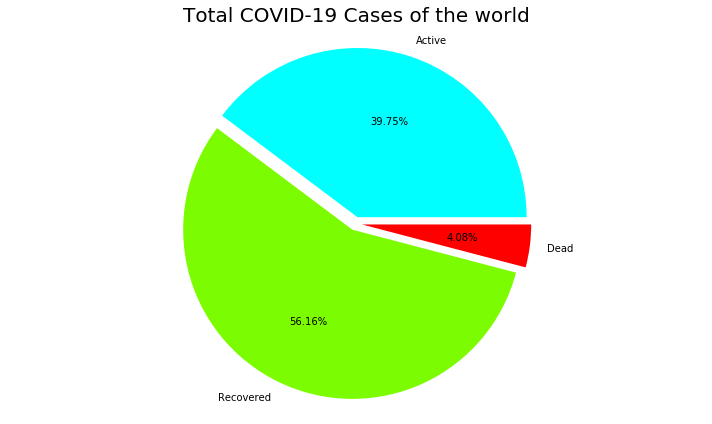

In [36]:
last_day = covid19_world.shape[0]-1
labels = ['Active','Recovered','Dead']
sizes = [covid19_world['Active'][last_day],covid19_world['Recovered'][last_day],covid19_world['Deaths'][last_day]]

plt.figure(figsize= (10,6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=0, explode =[0.04,0.04,0.04],
        colors = ['cyan','lawngreen','red'])
#centre_circle = plt.Circle((0,0),0.4,fc='white')

fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
plt.title('Total COVID-19 Cases of the world',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [37]:
# total status of the COVID-19 Cases of the world

date_df2 = covid19_world[['Confirmed', 'Recovered', 'Deaths','Active','Recovery rate(per 100)',
                         'Mortality rate(per 100)','Number of countries']].tail(1)

date_df2.style.background_gradient(cmap='autumn_r',axis=1).format("{:.2f}").format("{:.2f}")

In [38]:
# get ISO 3 codes for countries to draw choropleth

import pycountry

df1 = pd.read_csv('covid19_date_country.csv')

list_countries = df1['Country/Region'].unique().tolist()
d_country_code = {}  # To hold the country names and their ISO 3 code
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)

# create a new column iso_alpha in df1
for k, v in d_country_code.items():
    df1.loc[(df1['Country/Region'] == k), 'iso_alpha'] = v

could not add ISO 3 code for -> Burma
could not add ISO 3 code for -> Democratic Republic of the Congo
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> South Korea
could not add ISO 3 code for -> West Bank and Gaza


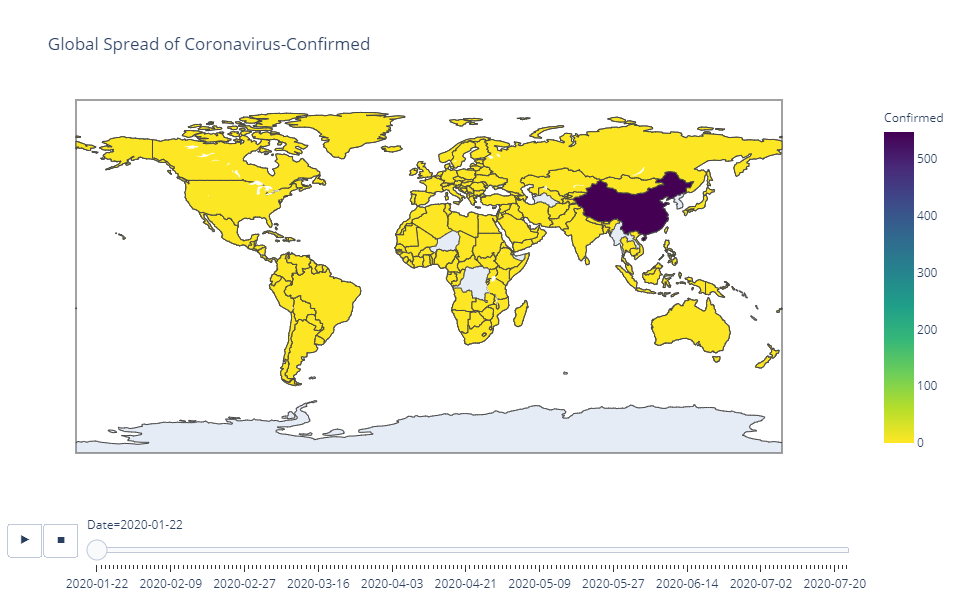

In [39]:
fig = px.choropleth(data_frame = df1, 
                    locations= "iso_alpha",
                    color= "Confirmed",  # value in column 'Confirmed' determines color
                    hover_name= "Country/Region",
                    color_continuous_scale="Viridis_r",
                    animation_frame= "Date",
                    title='Global Spread of Coronavirus-Confirmed')
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    margin=dict(
        l=1,
        r=1,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show()

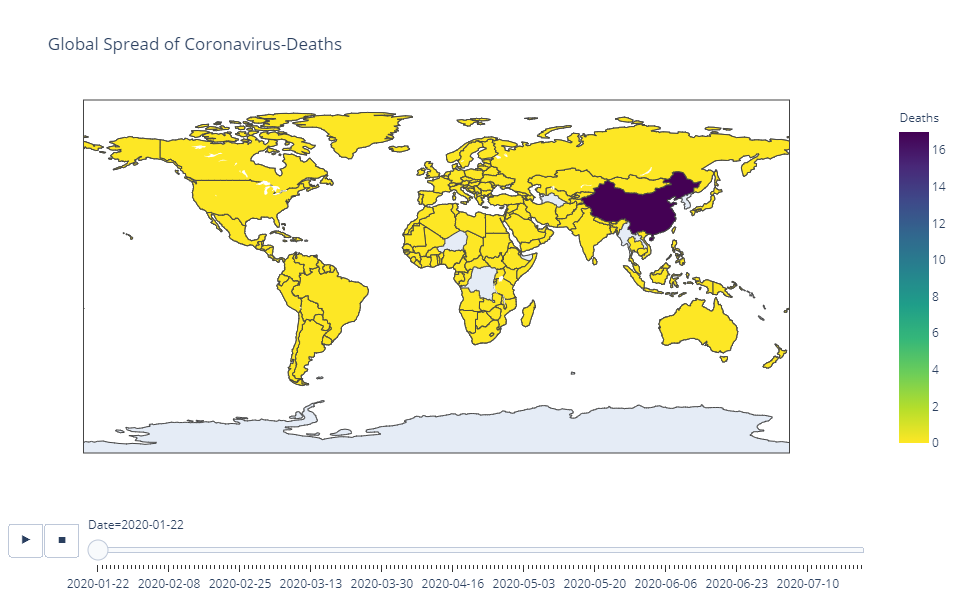

In [40]:
fig = px.choropleth(data_frame = df1, 
                    locations= "iso_alpha",
                    color= "Deaths",  # value in column '"Deaths' determines color
                    hover_name= "Country/Region",
                    color_continuous_scale="Viridis_r",
                    animation_frame= "Date",
                    title='Global Spread of Coronavirus-Deaths')
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
    margin=dict(
        l=1,
        r=1,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show()

##  Confirmed, Active, Recovered and Death cases in 10 Most-affected Countries

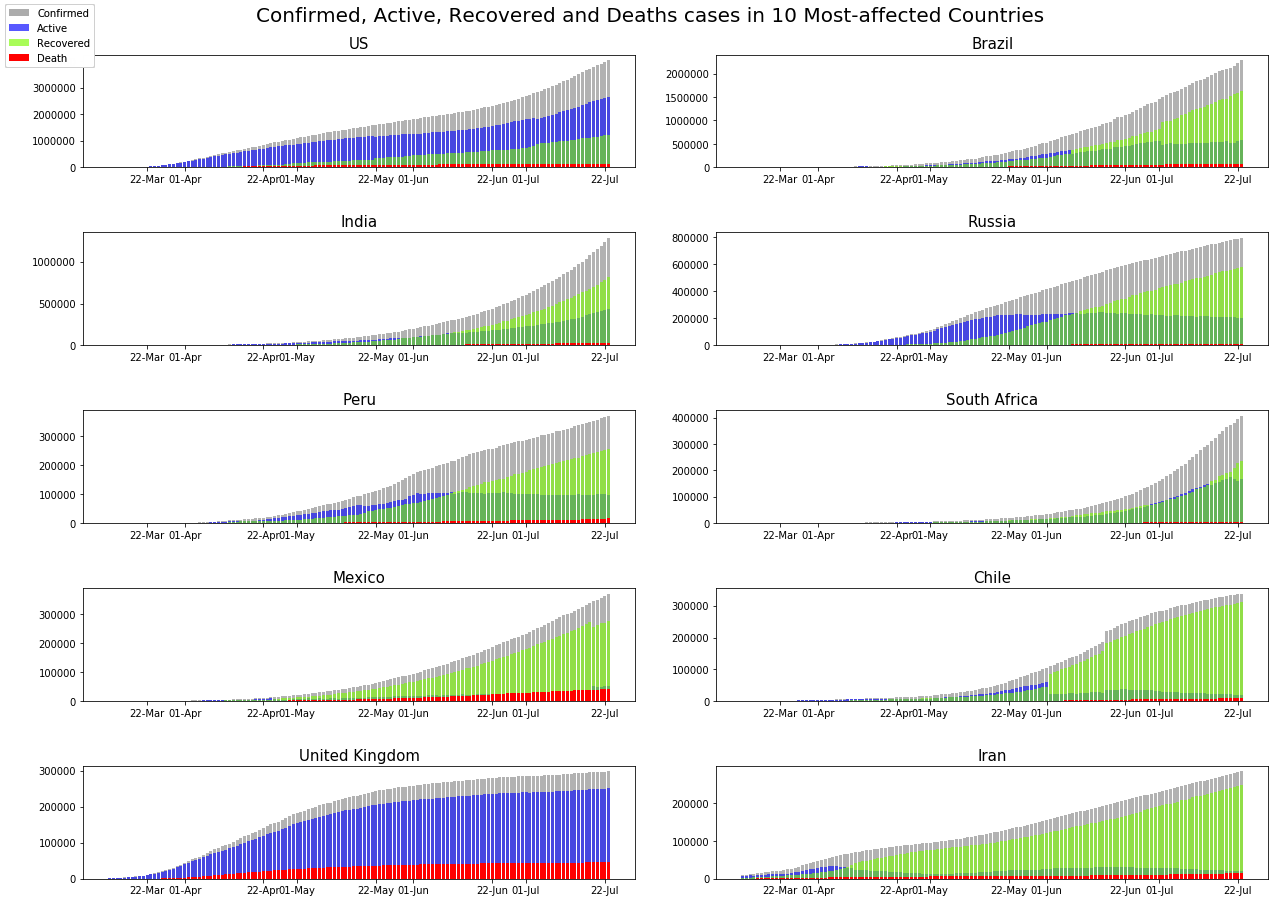

In [41]:
dates = covid19_world['Date'][50:]

# 10 most-affected countries to date 
most_affected=['US','Brazil','India','Russia','Peru','South Africa', 'Mexico','Chile', 'United Kingdom','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected[i]].iloc[50:,:]
    return df

fig = plt.figure(figsize= (18,15))
plt.suptitle('Confirmed, Active, Recovered and Deaths cases in 10 Most-affected Countries', fontsize = 20, y = 1.0)
k=0
for i in range(1,11):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(dates,country_df(k)['Confirmed'].values,color = 'grey',alpha = 0.6,label = 'Confirmed');
    ax.bar(dates,country_df(k)['Active'].values,color = 'blue',alpha = 0.6,label = 'Active');
    ax.bar(dates,country_df(k)['Recovered'].values,color='lawngreen',alpha = 0.6,label = 'Recovered');
    ax.bar(dates,country_df(k)['Deaths'].values,color='red',label = 'Death');   
    plt.title(most_affected[k], fontsize = 15)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

### Comparing Covid-19 case status of 10 most affected countries

In [42]:
def compare_plt(col):
    plt.figure(figsize= (20,10))
    plt.xticks(rotation = 60 ,fontsize = 11)
    plt.yticks(fontsize = 10)
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel('%s cases' % (col),fontsize = 20)
    plt.title("Covid-19 %s Cases of 10 Most Affected Countries" % (col), fontsize = 20)

    for i in range(len(most_affected)):
        plt.plot_date(y= country_df(i)[col].values,x= dates,label = most_affected[i],alpha=0.6,linestyle ='-')
    plt.legend();

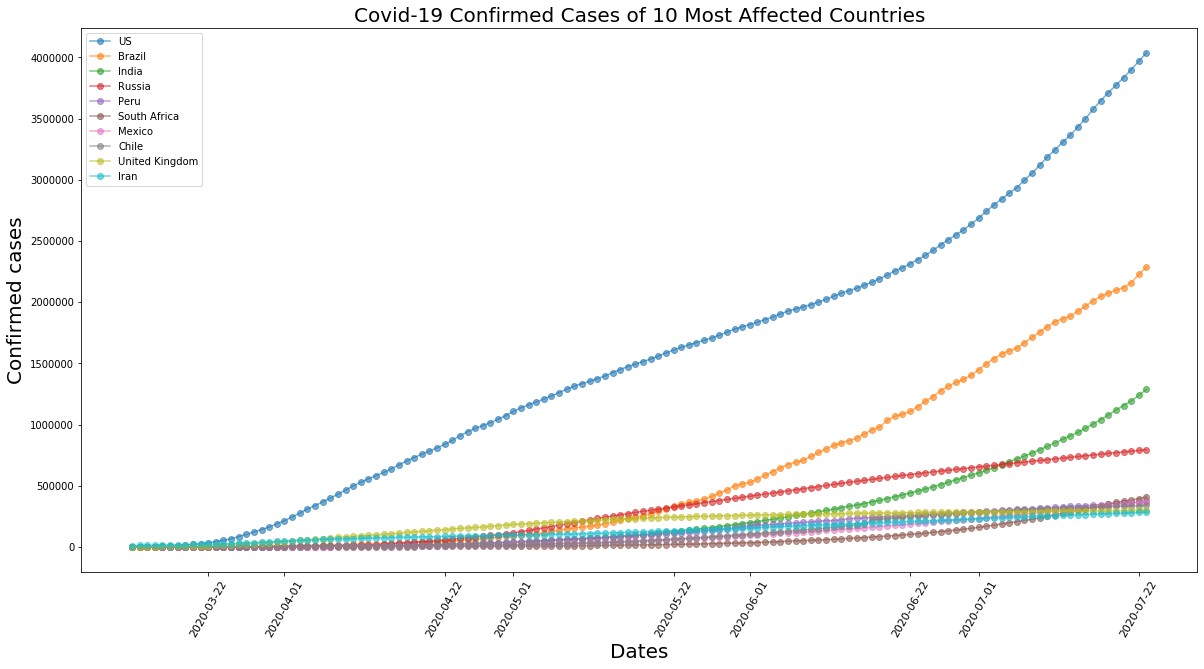

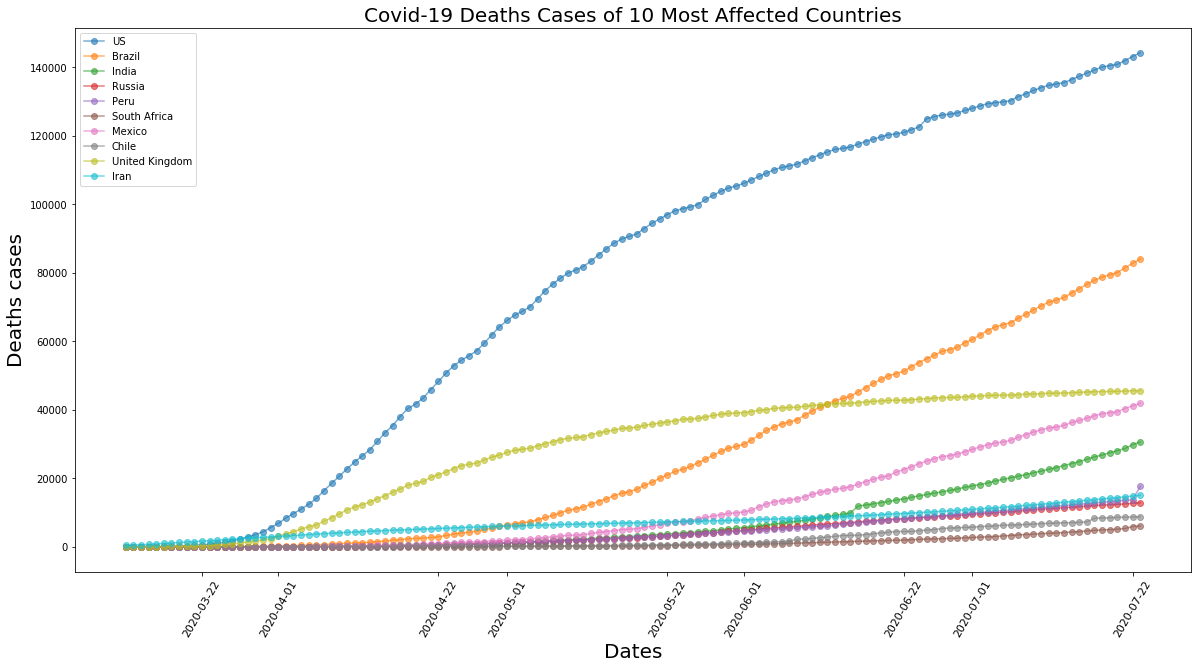

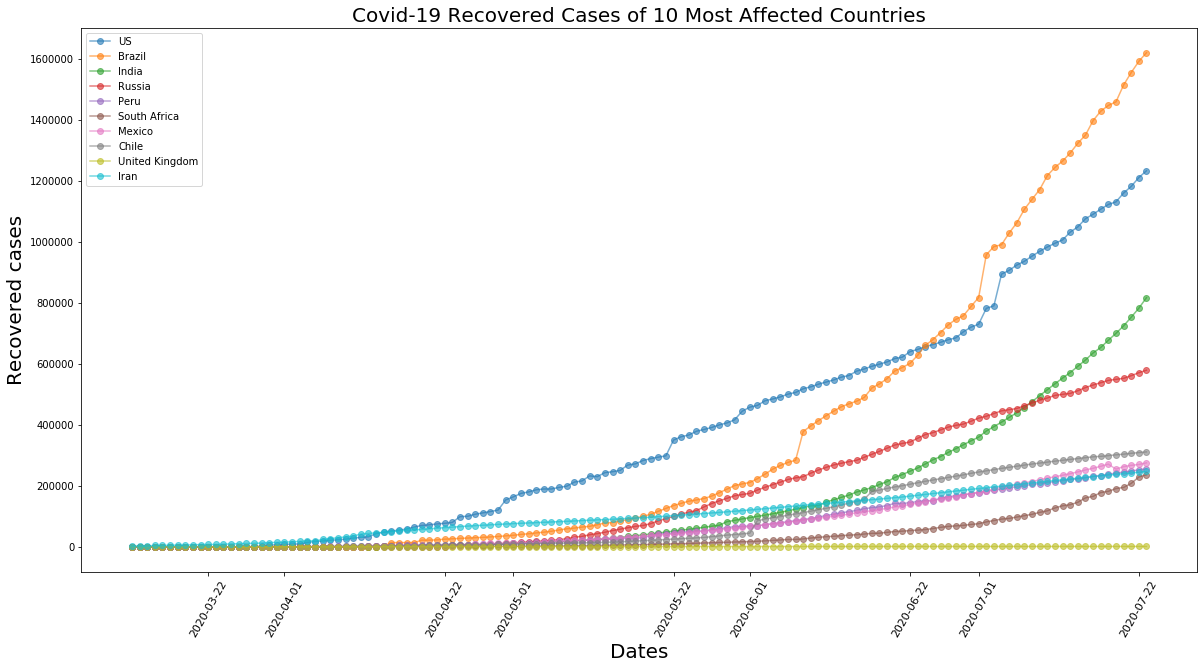

In [43]:
compare_plt('Confirmed')
compare_plt('Deaths')
compare_plt('Recovered')

### Confirmed, Recovered, Active and Death cases in Iran

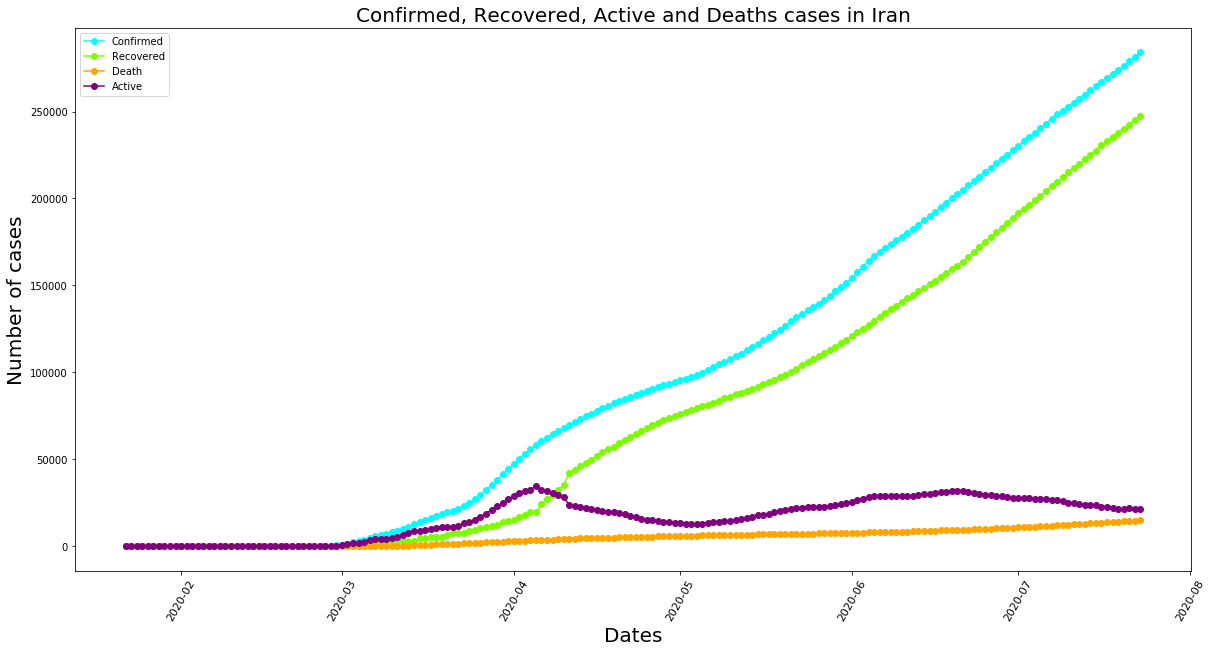

In [44]:
dates = covid19_world['Date'][:]

iran_df=covid19_date_country[covid19_date_country['Country/Region'] == 'Iran'].iloc[:,:] 

plt.figure(figsize= (20,10))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Number of cases',fontsize = 20)
plt.title("Confirmed, Recovered, Active and Deaths cases in Iran" , fontsize = 20)

ax1 = plt.plot_date(y= iran_df['Confirmed'].values,x= dates,label = 'Confirmed',linestyle ='-',color = 'cyan')
ax2 = plt.plot_date(y= iran_df['Recovered'].values,x= dates,label = 'Recovered',linestyle ='-',color = 'lawngreen')
ax3 = plt.plot_date(y= iran_df['Deaths'].values,x= dates,label = 'Death',linestyle ='-',color = 'orange')
ax4 = plt.plot_date(y= iran_df['Active'].values,x= dates,label = 'Active',linestyle ='-',color = 'purple')
plt.legend()

### Total COVID-19 confirmed, recovered, active and deaths cases (globally)

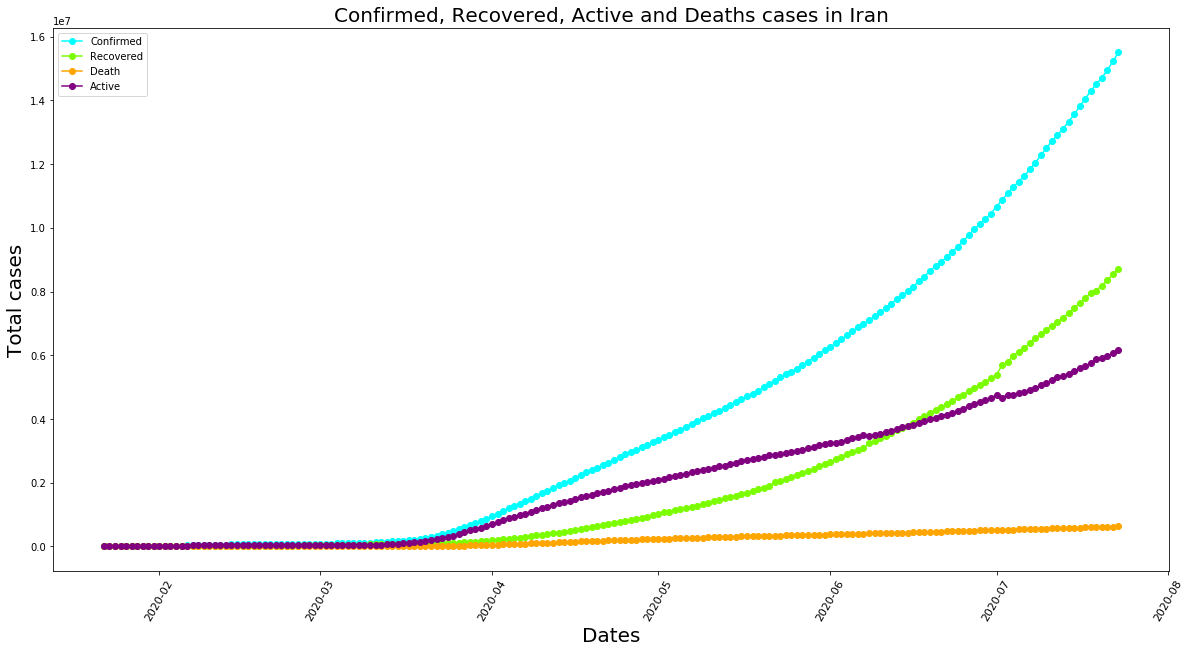

In [45]:
dates = covid19_world['Date'][:]

world_df=covid19_world.iloc[:,:] 

plt.figure(figsize= (20,10))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Confirmed, Recovered, Active and Deaths cases in Iran" , fontsize = 20)

ax1 = plt.plot_date(y= world_df['Confirmed'].values,x= dates,label = 'Confirmed',linestyle ='-',color = 'cyan')
ax2 = plt.plot_date(y= world_df['Recovered'].values,x= dates,label = 'Recovered',linestyle ='-',color = 'lawngreen')
ax3 = plt.plot_date(y= world_df['Deaths'].values,x= dates,label = 'Death',linestyle ='-',color = 'orange')
ax4 = plt.plot_date(y= world_df['Active'].values,x= dates,label = 'Active',linestyle ='-',color = 'purple')
plt.legend()

In [46]:
covid19_country_latest.copy().drop(['WHO region'],axis=1).sort_values('Confirmed',ascending=False)\
                    .reset_index(drop=True).iloc[:30,:].style.bar(align='left',width=80,color='gold')